## Parsing

In [18]:
import xml.etree.ElementTree as ET

tree = ET.parse('styleguide.xml')

In [19]:
tree.findall('.//subcategory/stats')[0].findall('./')[0].findall('./')[0].text

'8'

In [20]:
subs_attirb = ('name', 'aroma', 'appearance', 'flavor', 
               'mouthfeel',
              'impression', 'comments', 'history',
               'ingredients', 'comparison',
               'examples', 'tags', 'stats', 'entry_instructions')

In [21]:
import numpy as np
from tqdm import tqdm as bar

xml_parsed = [[tree.findall('.//subcategory/'+i)[x].text for x in range(len(tree.findall('.//subcategory/'+i)))] for i in subs_attirb]

In [22]:
xml_parsed = np.array(xml_parsed)
xml_parsed.shape

(14,)

In [23]:
import pandas as pd

df = pd.DataFrame(columns = ['Category'] + list(subs_attirb))

df['Category'] = xml_parsed[0]


subs = tree.findall('.//subcategory')


subs_t = [[e.tag for e in subs[i].findall('./')] for i in range(len(subs))]
len(subs_t)

for i in bar(range(len(subs))):
    for j in subs_attirb:
        if j in subs_t[i]:
            df.set_value(i, j, 1)
        else:
            df.set_value(i, j, 0)

  0%|          | 0/136 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
100%|██████████| 136/136 [00:00<00:00, 1970.95it/s]


# Thinking about features

In [24]:
df.iloc[:,1:].mean()

name                  1.000000
aroma                 0.904412
appearance            0.985294
flavor                0.985294
mouthfeel             0.985294
impression            0.977941
comments              0.904412
history               0.713235
ingredients           0.750000
comparison            0.698529
examples              0.941176
tags                  0.816176
stats                 1.000000
entry_instructions    0.360294
dtype: float64

In [25]:
tags = np.array(xml_parsed[11])

t = np.array([])
for i in bar(range(len(tags))):
    x = tags[i].split(',')
    for j in range(len(x)):
        t = np.append(t, x[j])

tags = t

t = np.unique(tags)[1:]
print(t)

100%|██████████| 111/111 [00:00<00:00, 2307.75it/s]

[' aged' ' amber-ale-family' ' amber-color' ' amber-lager-family'
 ' any-fermentation' ' balanced' ' bitter' ' bock-family'
 ' bottom-fermented' ' bottom-fermenting' ' british-isles'
 ' brown-ale-family' ' central-europe' ' craft-style' ' dark-color'
 ' dark-lager-family' ' eastern-europe' ' fruit' ' historical-style'
 ' hoppy' ' ipa-family' ' lagered' ' malty' ' north-america' ' pacific'
 ' pale-ale-family' ' pale-color' ' pale-lager-family' ' pilsner-family'
 ' porter-family' ' roasty' ' smoke' ' sour' ' sour-ale-family'
 ' specialty-beer' ' spic' ' spice' ' stout-family' ' strong-ale-family'
 ' sweet' ' top-fermented' ' top-fermenting' ' traditional-style'
 ' western-europe' ' wheat-beer-family' ' wild-fermented' ' wood'
 'high-strength' 'session-beer' 'session-strength' 'specialty-beer'
 'standard-strength' 'very-high-strength' 'wild-fermentation']


In [26]:
bin_tag_vect = pd.DataFrame(columns=['Name']+list(t))

from tqdm import trange

names_with_tags = np.array([])

for i in trange(136):
    if df['tags'][i] == 1 or df['tags'][i] == '1':
        names_with_tags = np.append(names_with_tags, df['Category'][i])

bin_tag_vect['Name'] = names_with_tags

tags = list(tags)
x = xml_parsed[11]
for i in range(len(bin_tag_vect)):
    for j in t:
        if j in x[i]:
            bin_tag_vect.set_value(i, j, 1)
        else:
            bin_tag_vect.set_value(i, j, 0)

bin_tag_vect

bin_tag_vect.index = bin_tag_vect.Name
bin_tag_vect = bin_tag_vect.iloc[:,1:]

100%|██████████| 136/136 [00:00<00:00, 4862.01it/s]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Making a binary vector

# Compessign

And still thinking about features. Actually about "tags"

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 111 samples in 0.000s...
[t-SNE] Computed neighbors for 111 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 111 / 111
[t-SNE] Mean sigma: 2.286438
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.697342


  1%|          | 1/111 [00:00<00:12,  9.01it/s]

[t-SNE] Error after 1000 iterations: 0.383541


100%|██████████| 111/111 [00:01<00:00, 69.27it/s]


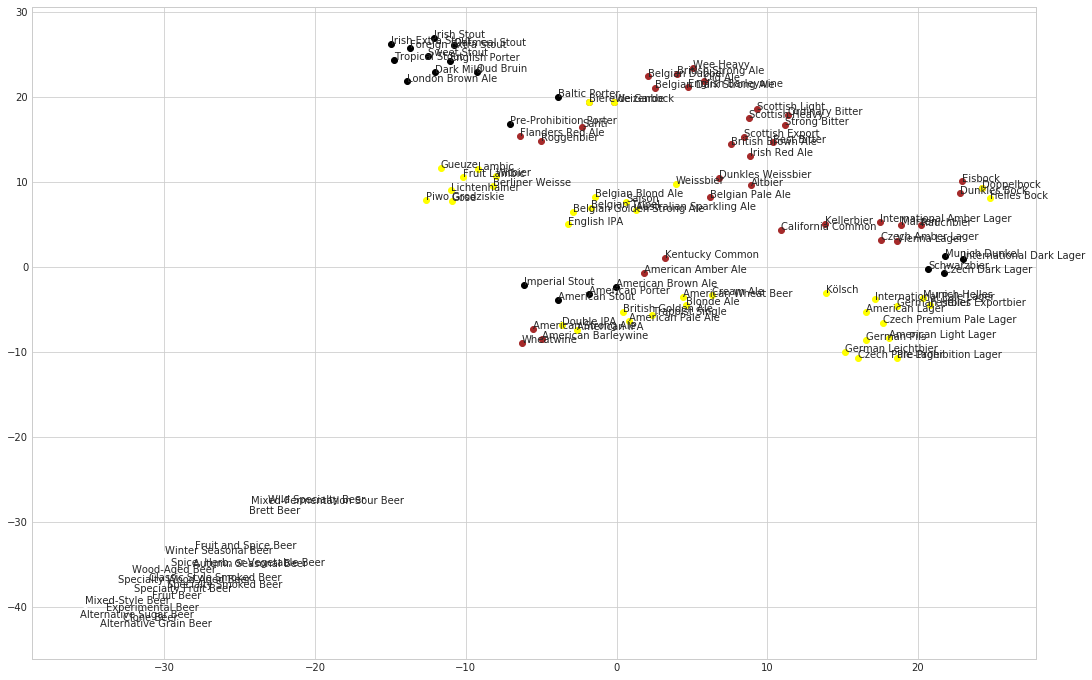

In [27]:
from sklearn.metrics.pairwise import pairwise_distances

dists = pairwise_distances(bin_tag_vect)

dists.shape

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.decomposition import *

pca = PCA(n_components = 8)
Xpca = pca.fit_transform(dists)

from sklearn.manifold import *

t_sne = TSNE(n_components= 2, perplexity=10, verbose = 1)
Xtsne = t_sne.fit_transform(Xpca)

x = [Xtsne[i][0] for i in range(len(Xtsne))]
y = [Xtsne[i][1] for i in range(len(Xtsne))]
    
names_with_tags.shape
colors = ['amber_color', 'pale_color', 'dark_color']

import seaborn as sns

sns.set_style('whitegrid')

col = xml_parsed[11]

fig = plt.figure(figsize=[18,12])
for i in trange(len(names_with_tags)):
    plt.text(x[i],y[i], names_with_tags[i])
    if ' amber-color' in col[i]:
        plt.scatter(x[i], y[i], c= 'brown')
    if ' dark-color' in col[i]:
        plt.scatter(x[i], y[i], c= 'black')
    if ' pale-color' in col[i]:
        plt.scatter(x[i], y[i], c= 'yellow')
    if not (' amber-color' in col[i] or ' pale-color' in col[i] or ' dark-color' in col[i]):
        plt.scatter(x[i], y[i], c= 'white')

# Ingredients, Aroma, Tags

Final dataset

In [28]:
ingr = xml_parsed[8]

names_with_ingr = np.array([])

for i in trange(136):
    if df['ingredients'][i] == 1:
        names_with_ingr = np.append(names_with_ingr, df['Category'][i])
        

all_names = list(set(names_with_ingr) & set(names_with_tags))

all_ind = [i for i in range(136) if df.Category[i] in all_names]

all_names = [df.Category[x] for x in all_ind]

100%|██████████| 136/136 [00:00<00:00, 3692.00it/s]


This is brilliant, and Im not gonna change it.

In [29]:
all_data = [[all_names[x], None, None, None] for x in range(102)]

#for tags
it = 0
ita = 0
for i in range(136):
    if df.tags[i] == 1:
        if df.Category[i] in all_names:
            all_data[ita][1] = xml_parsed[11][it]
            ita += 1
        it += 1
        
#for ingr
it = 0
ita = 0
for i in range(136):
    if df.ingredients[i] == 1:
        if df.Category[i] in all_names:
            all_data[ita][2] = ingr[it]
            ita += 1
        it += 1
        
#for aroma
it = 0
ita = 0
for i in range(136):
    if df.aroma[i] == 1:
        if df.Category[i] in all_names:
            all_data[ita][3] = xml_parsed[1][it]
            ita += 1
        it += 1

all_data = np.array(all_data)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF 

all_data_vect = all_data
arom_vect = TFIDF()
ingr_vect = TFIDF()

arom_vect.fit(all_data[:,3], all_data[:,0])
ingr_vect.fit(all_data[:,2], all_data[:,0])

#all_data_vect = list(all_data_vect)
x = arom_vect.transform(all_data[:,3])
y = ingr_vect.transform(all_data[:,2])


all_data_vect = [all_data[:,x] for x in range(4)]

all_data_vect[2] = y
all_data_vect[3] = x

t = [t[x].strip() for x in range(len(t))]

all_data_vect[1] = [[j.strip() for j in all_data_vect[1][x].split(',')] for x in range(len(all_data_vect[1]))]

def trans_to_bin_vect_tags(arr):
    out = []
    for i in t:
        if i in arr:
            out.append(1)
        else:
            out.append(0)
    return out

all_data_vect[1] = [trans_to_bin_vect_tags(all_data_vect[1][x]) for x in range(len(all_data_vect[1]))]

all_data_vect[1] = np.array(all_data_vect[1])

  1%|          | 1/102 [00:00<00:15,  6.55it/s]

(102,)
(102, 10)
(102, 10)
(102, 10)
(102, 30)


100%|██████████| 102/102 [00:01<00:00, 65.15it/s]


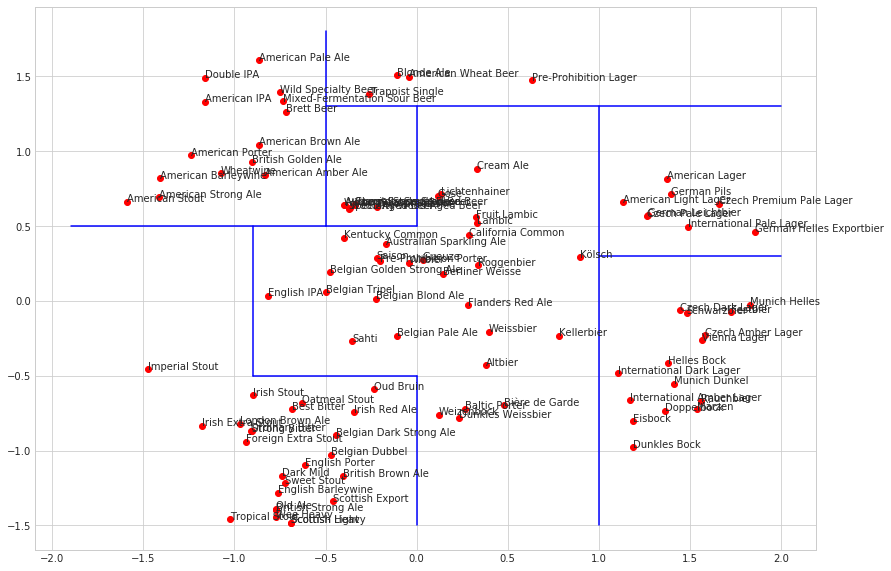

In [31]:
from sklearn.decomposition import TruncatedSVD as TSVD


all_data_compressed = [all_data_vect[0],None,None,None]

k = 10


pca_tags = TSVD(n_components=k)
all_data_compressed[1] = pca_tags.fit_transform(all_data_vect[1], all_data_vect[0])
pca_arom = TSVD(n_components=k)
all_data_compressed[3] = pca_arom.fit_transform(all_data_vect[3].todense(), all_data_vect[0])
pca_ingr = TSVD(n_components=k)
all_data_compressed[2] = pca_ingr.fit_transform(all_data_vect[2].todense(), all_data_vect[0])

all_data_compressed.append([])
for i in range(102):
    all_data_compressed[4].append(list(all_data_compressed[1][i])+list(all_data_compressed[2][i])
                                  +list(all_data_compressed[3][i]))
all_data_compressed[4] = np.array(all_data_compressed[4])

for i in range(len(all_data_compressed)):
    print(all_data_compressed[i].shape)

final_pca = PCA(n_components=2)
all_data_compressed.append(final_pca.fit_transform(all_data_compressed[4], all_data_compressed[0]))

fig = plt.figure(figsize=[14,10])
for i in trange(102):
    plt.scatter(all_data_compressed[5][i][0],all_data_compressed[5][i][1], c='r')
    plt.text(all_data_compressed[5][i][0],all_data_compressed[5][i][1], all_data_compressed[0][i])
    
#Hand-Tree making
plt.plot([-0.5,-0.5],[0.5, 1.8], c='blue')
plt.plot([-1.9,-0.5],[0.5,0.5], c='blue')
plt.plot([-0.9,-0.9],[0.5,-0.5], c='blue')
plt.plot([-0.9,0],[-0.5,-0.5], c='blue')
plt.plot([-0,0],[-0.5,-1.5], c='blue')
plt.plot([-0.5,2],[1.3,1.3], c='blue')
plt.plot([1,1],[-1.5,1.3], c='blue')
plt.plot([1,2],[0.3,0.3], c='blue')
plt.plot([-0.5,0],[0.5,0.5], c='blue')
plt.plot([0,0],[0.5,1.3], c='blue')

plt.savefig('Dists_tags_ingr_arom.png')
#plt.close()

In [32]:
import pickle as pk

with open('all_data_vect', 'wb') as f:
    pk.dump(all_data_vect, f)
with open('all_data', 'wb') as f:
    pk.dump(all_data, f)
with open('df', 'wb') as f:
    pk.dump(df, f)
with open('bin_tag_vect', 'wb') as f:
    pk.dump(bin_tag_vect, f)
with open('all_ind', 'wb') as f:
    pk.dump(all_ind, f)
with open('all_data_compressed', 'wb') as f:
    pk.dump(all_data_compressed, f)


In [33]:
User_obj_matrix = pd.DataFrame(columns=all_data_compressed[0])

categories = list(all_data_compressed[0])
poses = list(all_data_compressed[5])
def pred_by_dists(good_beers, n_nearest = 2, metric = 'sum_sq'):
    out = []
    for i in good_beers:
        out += dists_calc(i,n_nearest = n_nearest, metric = metric)
    return out
def dists_calc(category, n_nearest = 3, metric='sum_sq', position = [0,0]):
    if position == [0,0]:
        position = poses[categories.index(category)]
    cat = categories[0:categories.index(category)]+categories[categories.index(category)+1:]
    pos = poses[0:categories.index(category)]+poses[categories.index(category)+1:]
    res = []
    for i in range(len(pos)):
        if metric == "sum_sq": 
            dist = (sum([(pos[i][x]-position[x])**2 for x in range(len(pos[i]))]))**0.5
        if metric == 'max_dist':
            dist = (max([abs(pos[i][x]-position[x]) for x in range(len(pos[i]))]))
        if metric == 'city_dist':
            dist = (sum([abs(pos[i][x]-position[x]) for x in range(len(pos[i]))]))
        res.append([cat[i], dist])
    res = np.array(res)
    out = []
    for n in range(n_nearest):
        sub = res[res[:,1].argmin()][0]
        out.append(sub)
        res[res[:,1].argmin()] = ['kek','kek']
    return out

In [34]:
x = pred_by_dists(['American Light Lager'], metric='sum_sq',n_nearest=10)
y = pred_by_dists(['American Light Lager'], metric='city_dist',n_nearest=10)
z = pred_by_dists(['American Light Lager'], metric='max_dist',n_nearest=10)

xyz = pd.DataFrame(columns=['Sum_sq','City_dist','Max_dist'])
for i in range(len(x)):
    xyz.loc[i] = [x[i],y[i],z[i]]
xyz

,Sum_sq,City_dist,Max_dist
0,Czech Pale Lager,German Leichtbier,Czech Pale Lager
1,German Leichtbier,Czech Pale Lager,German Leichtbier
2,German Pils,German Pils,American Lager
3,American Lager,American Lager,German Pils
4,International Pale Lager,International Pale Lager,International Pale Lager
5,Kölsch,Czech Premium Pale Lager,Kölsch
6,Czech Premium Pale Lager,Kölsch,Czech Premium Pale Lager
7,German Helles Exportbier,Fruit Lambic,Munich Helles
8,Czech Dark Lager,German Helles Exportbier,Czech Dark Lager
9,Lambic,Lambic,German Helles Exportbier


# Users Generating

Is it useful?

In [ ]:
                 #xmin#xmax#ymin#ymax
rb =             [-1.5,1.7,-1.5,1.5]
users = pd.DataFrame(columns=['Pos1','Pos2','Categories'])

import random as rnd
from random import randint as r

amount_of_users = 10**4
for i in trange(amount_of_users):
    users.loc[i] = [[r(rb[0]*100,rb[1]*100)/100,r(rb[2]*100,rb[3]*100)/100],[r(rb[0]*100,rb[1]*100)/100,r(rb[2]*100,rb[3]*100)/100],None]

def nearest_cat(n_nearest = 3, metric='sum_sq', position = [0,0]):
    res = []
    for i in range(len(poses)):
        if metric == "sum_sq": 
            dist = (sum([(poses[i][x]-position[x])**2 for x in range(len(poses[i]))]))**0.5
        if metric == 'max_dist':
            dist = (max([abs(poses[i][x]-position[x]) for x in range(len(poses[i]))]))
        if metric == 'city_dist':
            dist = (sum([abs(poses[i][x]-position[x]) for x in range(len(poses[i]))]))
        res.append([categories[i], dist])
    res = np.array(res)
    out = []
    for n in range(n_nearest):
        sub = res[res[:,1].argmin()][0]
        out.append(sub)
        res[res[:,1].argmin()] = ['kek','kek']
    return out

for i in trange(amount_of_users):
    users.Categories[i] = np.unique(nearest_cat(r(1,5), 'sum_sq', users.Pos1[i]) + nearest_cat(r(1,5), 'sum_sq', users.Pos2[i])) 

s = [len(users.Categories[i]) for i in range(len(users.Categories))]
print('Mean amount of rated beer per user:', sum(s)/len(users.Categories))

def bin_vect_make(cat, col = User_obj_matrix.columns):
    out = [x for x in range(len(col))]
    for i in range(len(col)):
        if col[i] in cat:
            out[i] = 1
        else:
            out[i] = 0
    return out

for i in trange(len(users.Categories)):
    User_obj_matrix.loc[i] = bin_vect_make(users.Categories[i])

User_obj_matrix

# Making a Graph

In [35]:
from scipy.spatial import distance
dist_mtx = distance.squareform(distance.pdist(np.array(poses)))

In [36]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
distances_sparse = csr_matrix(dist_mtx)
Tcsr = minimum_spanning_tree(distances_sparse)
Tcsr.toarray().astype(float).mean()

0.0017347902421995726

In [37]:
pos2 = dict(enumerate(poses))

In [38]:
Tcsr.todense()

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.00472783,  0.        ]])

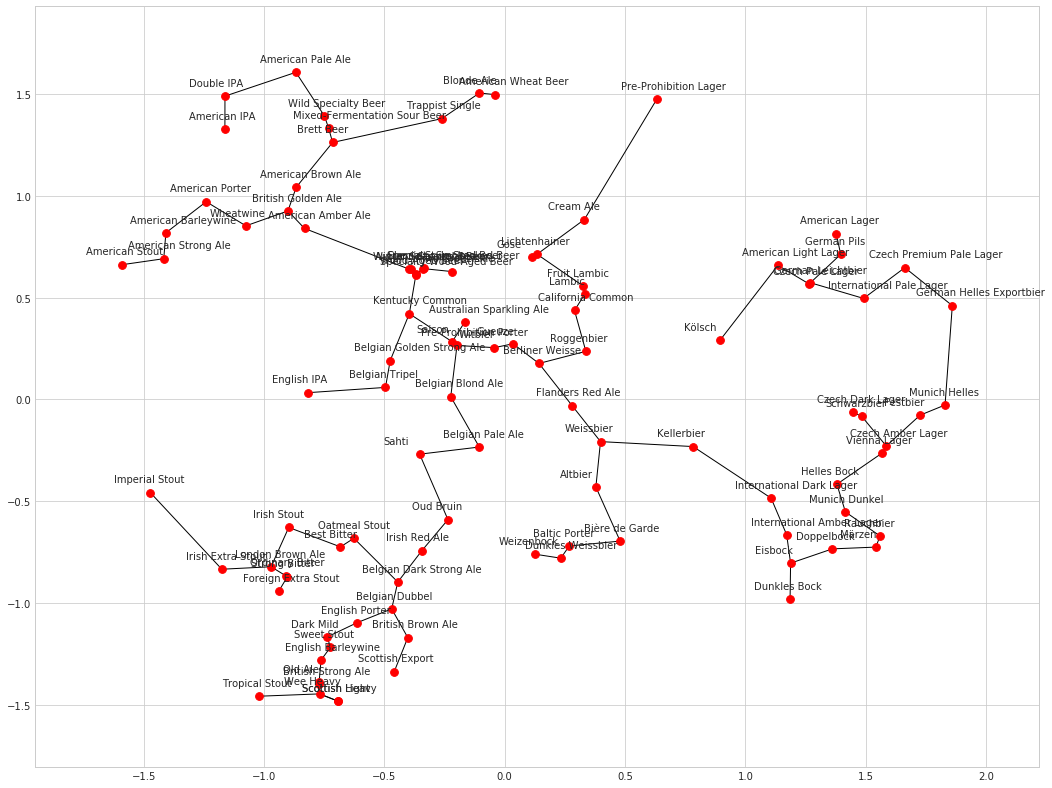

In [71]:
import networkx as nx

# G = nx.Graph(dist_mtx)
G = nx.Graph(Tcsr)


X = nx.minimum_spanning_tree(G)    
    
plt.figure(figsize=[18,14])
nx.draw_networkx(G, pos=pos2, with_labels=False, node_size=60)#, pos=pos2, with_labels=False, node_size = 15)
x, y = ([list(pos2.values())[i][0] for i in range(102)], [list(pos2.values())[i][1] for i in range(102)])
for i in range(len(all_data_compressed[0])):
    plt.text(np.array(x)[i]-0.15,np.array(y)[i]+0.05,all_data_compressed[0][i]) 
plt.savefig('MST_pic.png')
plt.show()

In [56]:
err = tree.findall('.//subcategory')[0].text

In [64]:
x = tree.findall('.//subcategory')
names = all_data_compressed[0]
desc = []
for i in range(len(x)):
    if x[i][0].text in names:
        desc.append([x[i][l].text for l in range(len(x[i])) if x[i][l].text[0] != err[0]])
desc = np.array(desc)

In [73]:
desc.shape

(102,)

In [49]:
import json as js

In [76]:
with open('data/description.json', 'w') as f:
    js.dump(list(desc), f)

In [129]:
with open('data/names.json', 'w') as f:
    js.dump(list(all_data_compressed[0]), f)

In [135]:
dd = [(all_data_compressed[0][i],list(poses[i])) for i in range(len(all_data_compressed[0]))]
with open('data/name_and_distances.json', 'w') as f:
    js.dump(dd, f)

In [144]:
ddd = []
for i in range(len(all_data_compressed[0])):
    for j in range(len(all_data_compressed[0])):
        ddd.append((i,j,dist_mtx[i][j]))

In [148]:
with open('data/distances.json', 'w') as f:
    js.dump(ddd, f)

In [42]:
lol = np.array(Tcsr.todense())

In [46]:
lol[0][0]

0.0

In [47]:
dddd = []
for i in range(len(all_data_compressed[0])):
    for j in range(len(all_data_compressed[0])):
        dddd.append((i,j,lol[i][j]))

In [50]:
with open('data/distances_min.json', 'w') as f:
    js.dump(dddd, f)

In [153]:
from predict_nearest import *

pred_by_dists(['American Lager'],[1])